## Multivariate Linear Regression Analysis for smoker

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import explained_variance_score,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
# import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

In [17]:
df_smoker = pd.read_csv('/Users/katari/Desktop/git/Medical_cost_dataset/src/data/smoker_data.csv')


In [19]:
df_smoker = pd.get_dummies(df_smoker,drop_first=True)
df_smoker=df_smoker.drop('Unnamed: 0', axis=1)
df_smoker.head()

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,0,0,0,1
1,62,26.29,0,27808.7251,0,0,1,0
2,27,42.13,0,39611.7577,1,0,1,0
3,30,35.30,0,36837.4670,1,0,0,1
4,34,31.92,1,37701.8768,0,0,0,0


In [20]:
df_smoker.drop(['children','sex_male', 'region_northwest',
       'region_southeast', 'region_southwest'],axis=1,inplace=True)

In [21]:
X = df_smoker.drop('charges',axis=1)
y = df_smoker['charges']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
#Standardizing the values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Intercept: {:.4f} \ncte1: {:.4f}\ncte2: {:.4f}'
      .format(model.intercept_,model.coef_[0],
      model.coef_[1]))
print('Model_Accuracy_Score (R Square): {:.4f} \nLoss(RMSE): {:.4f}'
      .format(r2_score(y_pred,y_test),
    np.sqrt(mean_squared_error(y_pred,y_test))))

Intercept: 32462.9003 
cte1: 3608.7837
cte2: 9131.7021
Model_Accuracy_Score (R Square): 0.6788 
Loss(RMSE): 5290.7667


#### Linear Regression visulaization for smokers

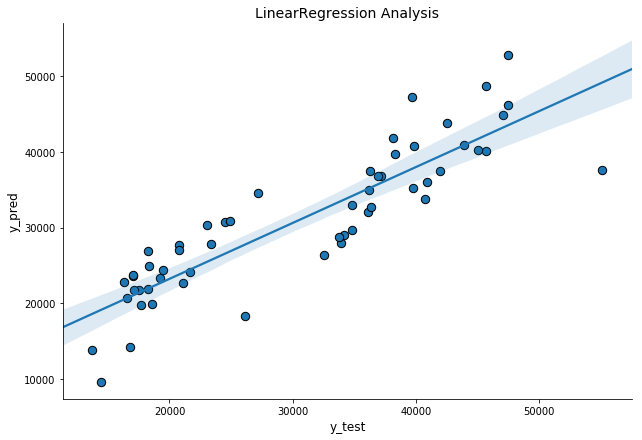

In [22]:
def model_scatter_plot(model):
    title = str(model)
    title = title.split('.')[3]
    title = title.replace("'>",'')
    lreg = model()
    lreg.fit(X_train,y_train)
    y_pred = lreg.predict(X_test)
    #model_table
    model_table = pd.DataFrame(y_pred,y_test).reset_index()
    model_table.columns=['y_test','y_pred']
    #Model Graph
    sns.lmplot(x = 'y_test',y='y_pred',data = model_table,size=6,aspect=1.5,
           scatter_kws={"s": 70, "alpha": 1,'edgecolor':'black'},fit_reg=True)
    plt.title(title +' Analysis',fontsize=14)
    plt.xlabel('y_test',fontsize=12)
    plt.ylabel('y_pred',fontsize=12)
    #plt.scatter(y_test,y_pred)
    return plt.show()

model_scatter_plot(LinearRegression)

#### Use the model

In [23]:
# how much would a person pay for insurance if he 
# is smoker with a specific and bmi value

def use_model(age, bmi_value):
    c = [[age,bmi_value]]
    c = sc.transform(c)
    charge_value = model.coef_[0]*(c[0][0]) + model.coef_[1]*(c[0][1]) + model.intercept_
    charge_value = np.exp(charge_value)
    x = ('The Insurrance Charges for a {:.1f} years old person who is a Smoker with an bmi = {:.1f} will be {:.4f}'.format(age,bmi_value,charge_value))
    # we use the np.exp() because we transformed the value of charge during the charge EDA earlier above
    return print(x)
    
    

In [24]:
#if you are a smoker of 23 yr old and bmi of 32 then what 
# insurrance would you be charged?
use_model(24,40)


The Insurrance Charges for a 24.0 years old person who is a Smoker with an bmi = 40.0 will be inf


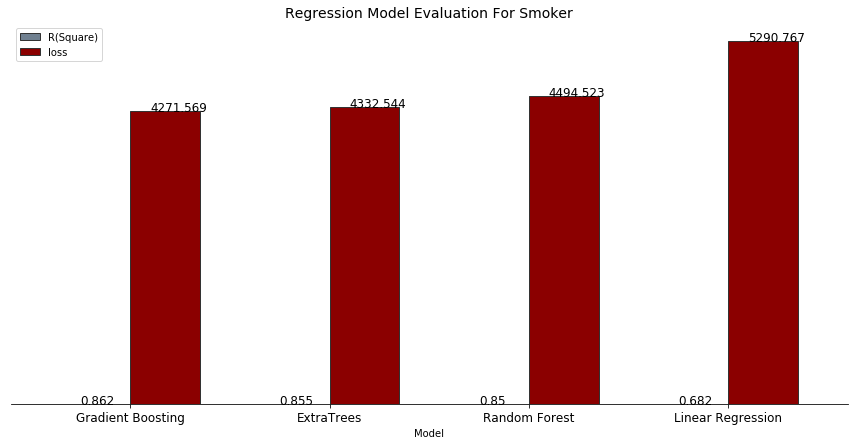

In [25]:
def robust_model(input):
    #Model type to evaluate
    model_list = [ExtraTreesRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),
            LinearRegression()]
    r_score = []
    loss = []
    for reg in model_list:
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_test)
        r_score.append(explained_variance_score(y_pred,y_test))
        loss.append(np.sqrt(mean_squared_error(y_pred,y_test)))
    ## Model score table
    model_str = ['ExtraTrees','Random Forest','Gradient Boosting',
            'Linear Regression']
    other_model = pd.DataFrame(r_score,model_str).reset_index()
    other_model.columns = ['Model','R(Square)']
    other_model['loss'] = loss
    other_model.sort_values('R(Square)',ascending=False,inplace=True)
    ## Model Graph
    ax = other_model[['R(Square)','loss']].plot(kind='bar',width=0.7,
                            figsize=(15,7), color=['slategray', 'darkred'], fontsize=13,edgecolor='0.2')
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+.1, i.get_height()+0.01, \
                str(round((i.get_height()), 3)), fontsize=12, color='black',)
    ax.set_title('Regression Model Evaluation For '+input,fontsize=14,color='black')
    ax.set_xticklabels(other_model.Model, rotation=0, fontsize=12)
    ax.set_xlabel('Model')
    x_axis = ax.axes.get_yaxis().set_visible(False)
    sns.despine(left=True)
    return plt.show()

robust_model('Smoker')

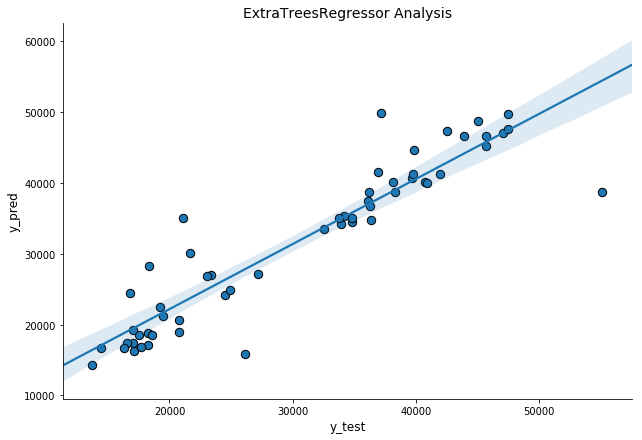

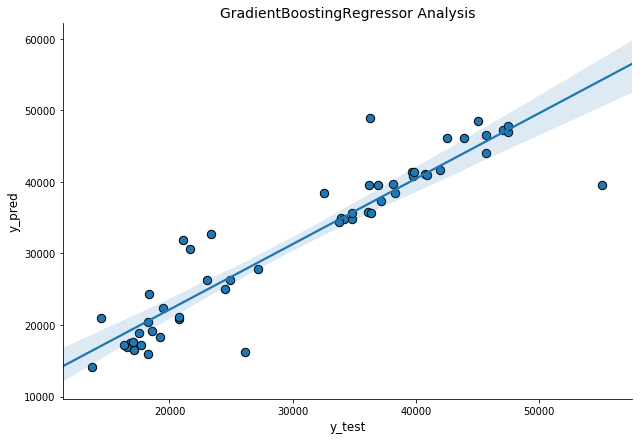

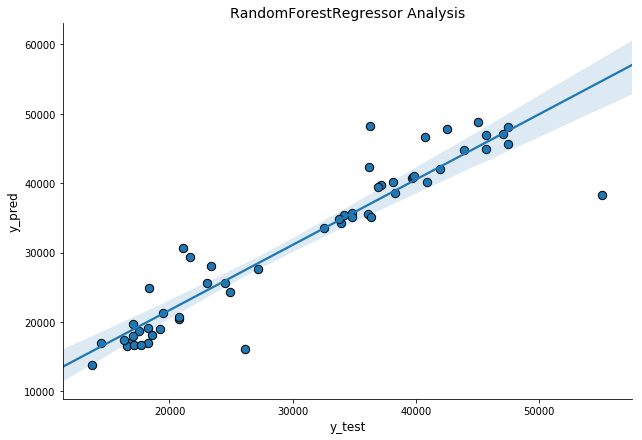

In [26]:
# Let's visualize the test data vs. the predicted data
model_scatter_plot(ExtraTreesRegressor)

model_scatter_plot(GradientBoostingRegressor)

model_scatter_plot(RandomForestRegressor)